In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df=pd.read_csv('/content/scores_data.csv')
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


Analysing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [4]:
# so here we can see there are no null values in data 
# user id is not essential column so we can drop it
# we can convert user id column into numeric type

In [5]:
#Clean the column names
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [6]:
df.drop("User_ID", axis=1, inplace =True)
df.columns

Index(['Batch', 'Score'], dtype='object')

In [7]:
# split the Score column into Obtained Score and Total Score
df[['Obtained_Score', 'Total_Score']] = df['Score'].str.split('/', expand=True)
df[['Obtained_Score', 'Total_Score']] = df[['Obtained_Score', 'Total_Score']].apply(pd.to_numeric)
print(df.head())

        Batch  Score  Obtained_Score  Total_Score
0  AI_ELITE_7  6 / 7               6            7
1  AI_ELITE_7  6 / 7               6            7
2  AI_ELITE_7  7 / 7               7            7
3  AI_ELITE_7  7 / 7               7            7
4  AI_ELITE_7  4 / 7               4            7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Batch           149 non-null    object
 1   Score           149 non-null    object
 2   Obtained_Score  149 non-null    int64 
 3   Total_Score     149 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ KB


In [9]:
df.drop('Score', axis=1)

,Batch,Obtained_Score,Total_Score
0,AI_ELITE_7,6,7
1,AI_ELITE_7,6,7
2,AI_ELITE_7,7,7
3,AI_ELITE_7,7,7
4,AI_ELITE_7,4,7
...,...,...,...
144,AI_ELITE_4,4,7
145,AI_ELITE_4,4,7
146,AI_ELITE_4,4,7
147,AI_ELITE_4,3,7


In [10]:
###Analysing a score column 

In [11]:
df.describe()

,Obtained_Score,Total_Score
count,149.000000,149.0
mean,4.382550,7.0
std,1.592199,0.0
min,0.000000,7.0
25%,3.000000,7.0
50%,4.000000,7.0
75%,5.000000,7.0
max,7.000000,7.0


In [12]:
df.isnull().sum()

Batch             0
Score             0
Obtained_Score    0
Total_Score       0
dtype: int64

In [13]:
#here we can see our processed data is neat and clean

In [14]:
df.Obtained_Score.mean()

4.382550335570469

In [15]:
df.Obtained_Score.median()

4.0

In [16]:
#here we can see there is no big difference in mean and median of score so there is no outlier

In [17]:
df.Obtained_Score.std()

1.5921993773540133

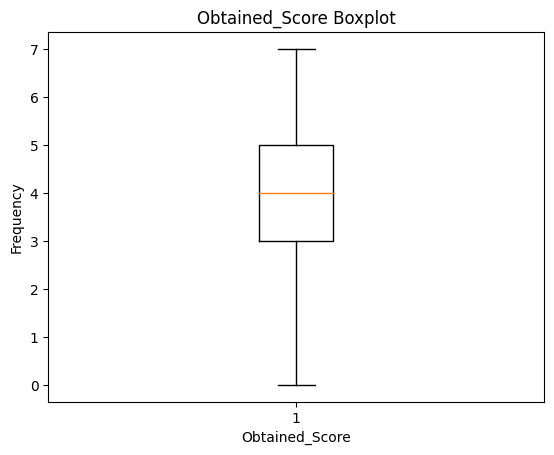

In [18]:
#checking outliers for Obtained Score
plt.boxplot(df["Obtained_Score"])
plt.title('Obtained_Score Boxplot')
plt.xlabel("Obtained_Score")
plt.ylabel("Frequency")
plt.show()

In [19]:
# here we can see our data even and  has no outlier in it.

In [20]:
#performing Univariate analysis

In [21]:
df.Batch.value_counts()

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

<Axes: >

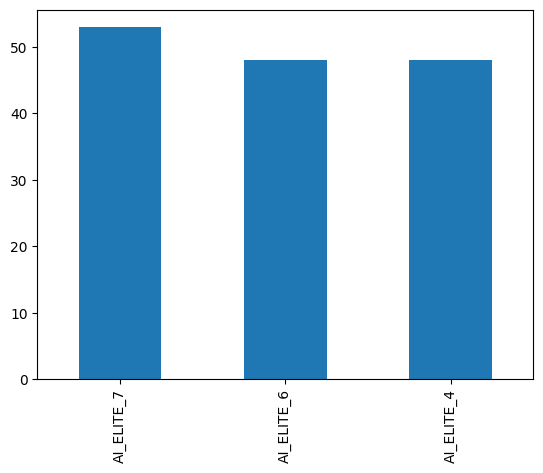

In [23]:
df.Batch.value_counts().plot(kind="bar")

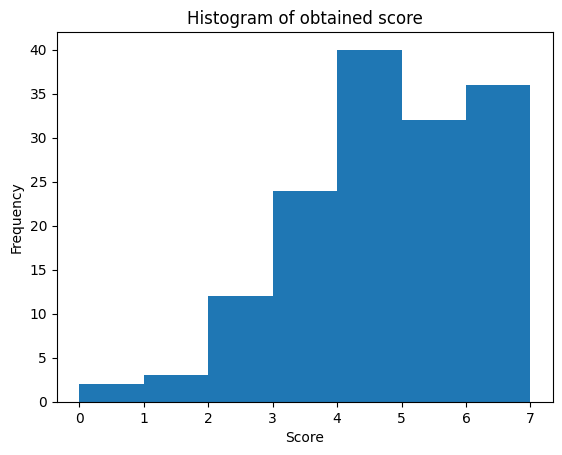

In [27]:
# Create a histogram of the score column
plt.hist(df['Obtained_Score'], bins=7)
plt.title("Histogram of obtained score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Bivarate Analysis

In [28]:
df["Batch"].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [29]:
#Create a subsets of the data for each batch
batch_7=df[df['Batch']=='AI_ELITE_7']
batch_6=df[df['Batch']=='AI_ELITE_6']
batch_4=df[df['Batch']=='AI_ELITE_4']

In [31]:
#comparing the summary statistics of each batch
print('Batch 7 summary statistics:')
print(batch_7["Obtained_Score"].describe())
print('Batch 6 summary statistics:')
print(batch_6["Obtained_Score"].describe())
print('Batch 4 summary statistics:')
print(batch_4["Obtained_Score"].describe())

Batch 7 summary statistics:
count    53.000000
mean      5.056604
std       1.446682
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: Obtained_Score, dtype: float64
Batch 6 summary statistics:
count    48.000000
mean      4.229167
std       1.640441
min       0.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: Obtained_Score, dtype: float64
Batch 4 summary statistics:
count    48.000000
mean      3.791667
std       1.443376
min       0.000000
25%       3.000000
50%       4.000000
75%       4.250000
max       7.000000
Name: Obtained_Score, dtype: float64


In [ ]:
#here according to the stats we can say batch_7 have highest rate of students scoring high marks 
# batch_4 students  have lowest rate of score , about 75% students have scored less than 5.

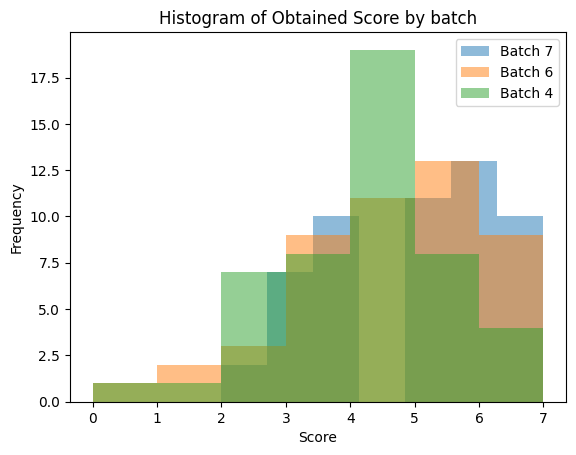

In [33]:
#Creating visualizations  to compare the score distribuution for each batch
plt.hist(batch_7['Obtained_Score'], bins=7, alpha=0.5,label="Batch 7")
plt.hist(batch_6['Obtained_Score'], bins=7, alpha=0.5,label="Batch 6")
plt.hist(batch_4['Obtained_Score'], bins=7, alpha=0.5,label="Batch 4")
plt.title("Histogram of Obtained Score by batch")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<Axes: xlabel='Obtained_Score'>

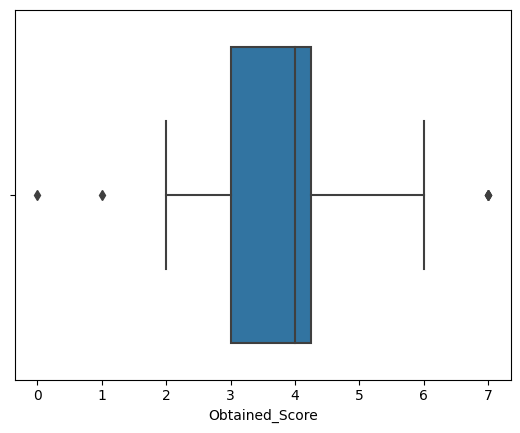

In [45]:
AI_ELITE_4= df[df['Batch'] == 'AI_ELITE_4']
sns.boxplot(x=AI_ELITE_4['Obtained_Score'])

In [ ]:
# here we can see as per the statistical guideline we can say that above batch have outliers in it , 
#but when we consider domain knowlegde here  the lowest and highest values are the marks scored by the students which can be as low as 0 and highest out of marks so we cant consider it as an outlier

<Axes: xlabel='Batch', ylabel='Obtained_Score'>

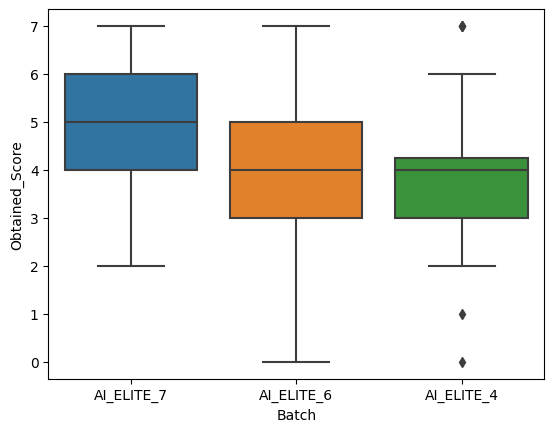

In [38]:
sns.boxplot(x='Batch', y='Obtained_Score', data=df)

In [35]:
batch_7_scores = batch_7['Obtained_Score']
batch_6_scores = batch_6['Obtained_Score']
batch_4_scores = batch_4['Obtained_Score']


In [36]:
f_statistic, p_value = stats.f_oneway(batch_7_scores, batch_6_scores, batch_4_scores)
if p_value < 0.05:
    print('There is a statistically significant difference in scores between the batches.')
else:
    print('There is no statistically significant difference in scores between the batches.')


There is a statistically significant difference in scores between the batches.


In [ ]:
# observation:
#1. From above analysis we can see that there is significant difference in ther performance of batches .
#2. batch 7 have highest performace rate than other two batches.
#3. Batch_4 have lowest performancce rate as per the scores obtained by them.
#4.Batch_4 students have high diffrences in marks obtained by them 

#Suggestion:
#batch_7 is performing well so it need to be consistent this way
#batch_6 is in way to perform good so need quite atttention in few points , as we have limited data so canty say which art needs to be or which student need more attention
#Batch_4 is performing as compared to other batches and need more attention towards them for performing good.